# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, a dataset of real estate sales transactions will be used to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

data = pd.read_excel('Real estate valuation data set.xlsx')
data.head(32)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
for columns in data.columns[1:8]:
    print(data[str(columns)].describe())

In [3]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

### Explore the Label Distribution

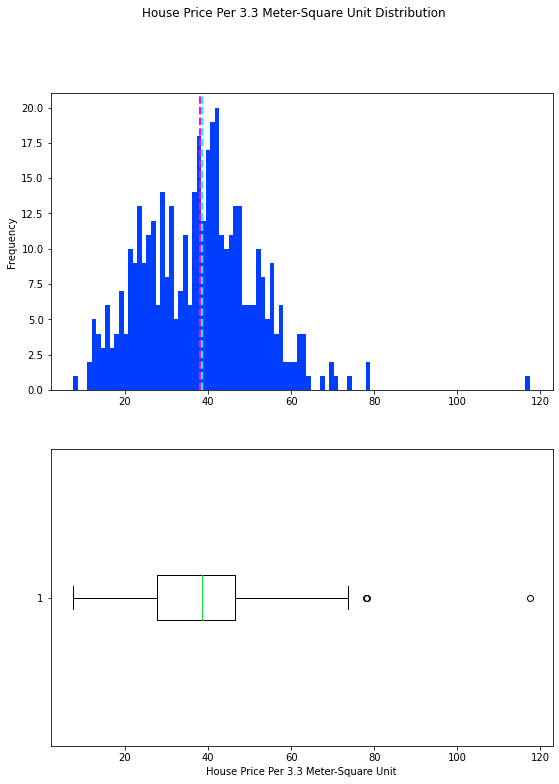

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-bright')

# Get the labels (y) column
label = data['Y house price of unit area']

# Create a figure for 2 subplots, an histogram and 
fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(9,12))

# Plot an Histogram to the first subplot
ax[0].hist(label, bins=100)
ax[0].set(ylabel = 'Frequency')
ax[0].axvline(label.mean(), color = 'magenta', linestyle='--', linewidth=2)
ax[0].axvline(label.median(), color = 'cyan', linestyle='--', linewidth=2)

# Plot the box plot in the second subplot
ax[1].boxplot(label, vert=False)
ax[1].set(xlabel= 'House Price Per 3.3 Meter-Square Unit')

# Add a title to the figure 
fig.suptitle('House Price Per 3.3 Meter-Square Unit Distribution')

# Save the plots
fig.savefig('label-distribution.png')

The plots show that the house price per 3.3 metre-square unit ranges from 0 to 118. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 80 units. The few values above this are shown in the box plot as small circles, indicating that they are *outliers* - in other words, unusually high or low values beyond the typical range of most of the data.

### Remove Outliers

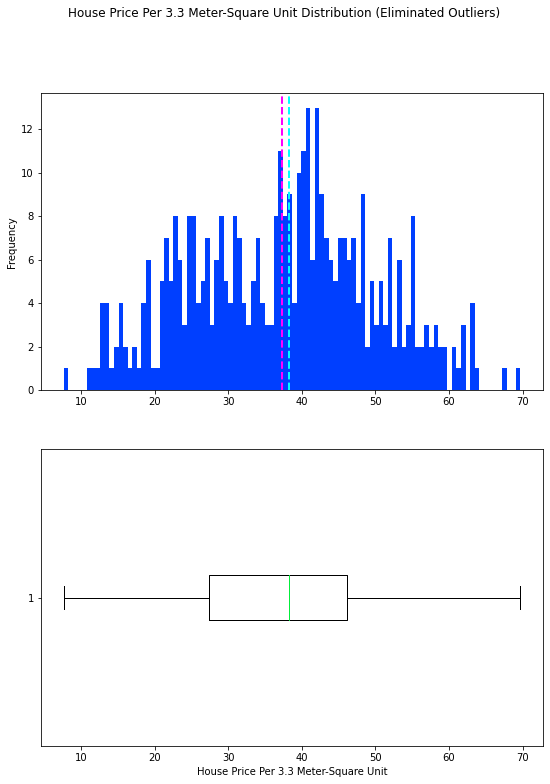

In [5]:
data_70 = data[data['Y house price of unit area']<70]
# Get the label column
label_70 = data_70['Y house price of unit area']

# Create a figure for 2 subplots, an histogram and 
fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(9,12))

# Plot an Histogram to the first subplot
ax[0].hist(label_70, bins=100)
ax[0].set(ylabel = 'Frequency')
ax[0].axvline(label_70.mean(), color = 'magenta', linestyle='--', linewidth=2)
ax[0].axvline(label_70.median(), color = 'cyan', linestyle='--', linewidth=2)

# Plot the box plot in the second subplot
ax[1].boxplot(label_70, vert=False)
ax[1].set(xlabel= 'House Price Per 3.3 Meter-Square Unit')

# Add a title to the figure 
fig.suptitle('House Price Per 3.3 Meter-Square Unit Distribution (Eliminated Outliers)')

# Save the plots
fig.savefig('label-distribution-without-outliers.png')

### View Numeric Correlations

Numeric features house age, transit_distance, latitude & longitude

In [6]:
numerical_features = data_70[data_70.columns[1:-1]]
numerical_features

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


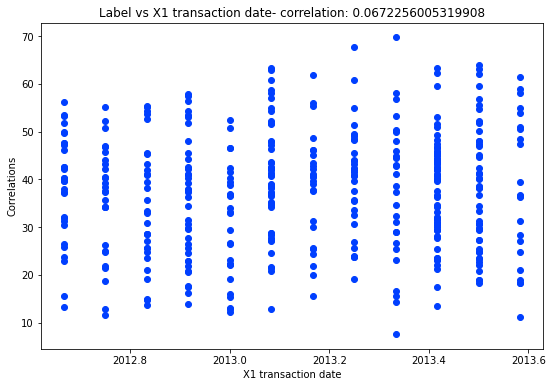

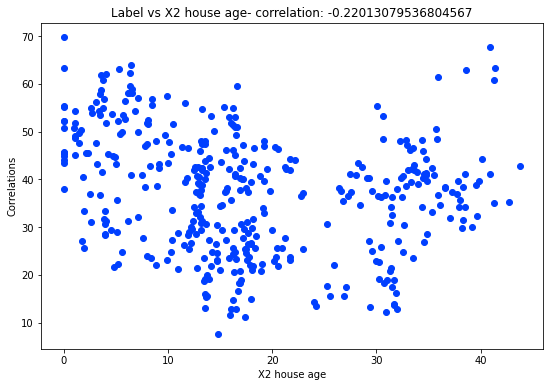

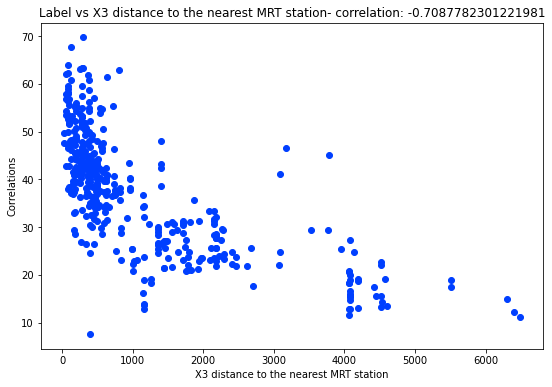

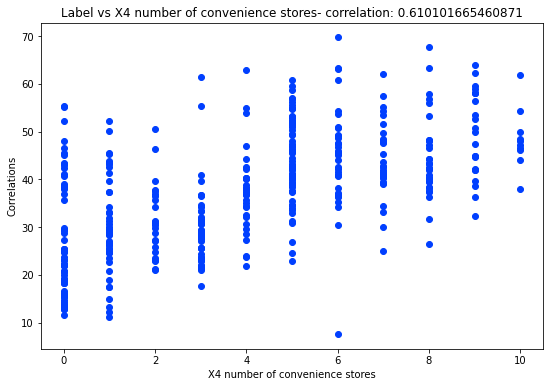

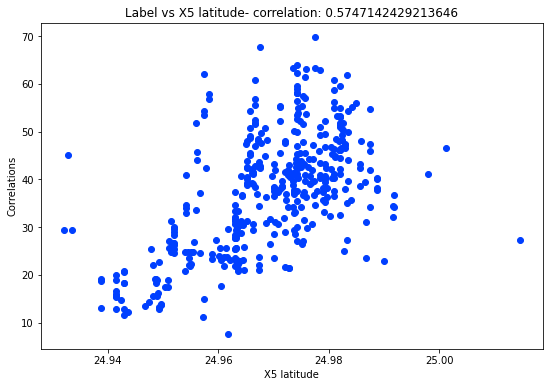

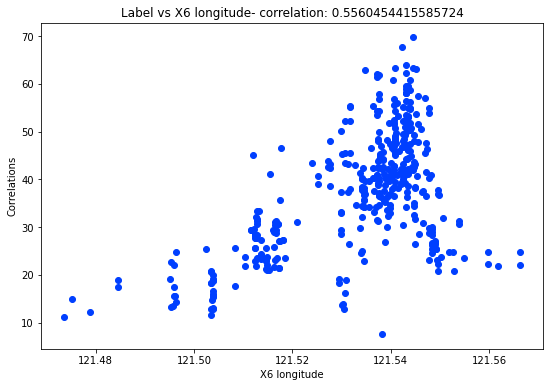

In [7]:
for col in numerical_features:
    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    feature = data_70[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label_70)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
    fig.savefig(col + '.png')
plt.show()

### View Categorical Features


In [8]:
categorical_features = data_70[['X1 transaction date', 'X4 number of convenience stores']]
categorical_features

,X1 transaction date,X4 number of convenience stores
0,2012.916667,10
1,2012.916667,9
2,2013.583333,5
3,2013.500000,5
4,2012.833333,5
...,...,...
409,2013.000000,0
410,2012.666667,9
411,2013.250000,7
412,2013.000000,5


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


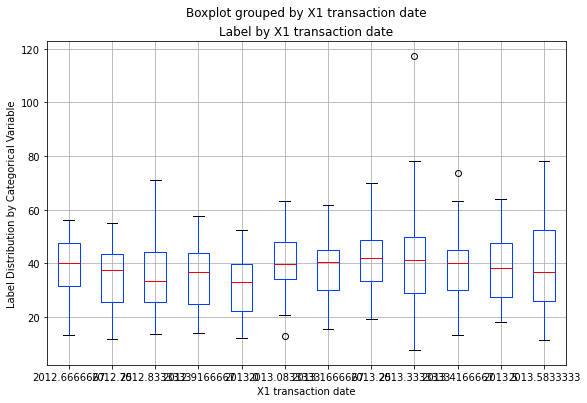

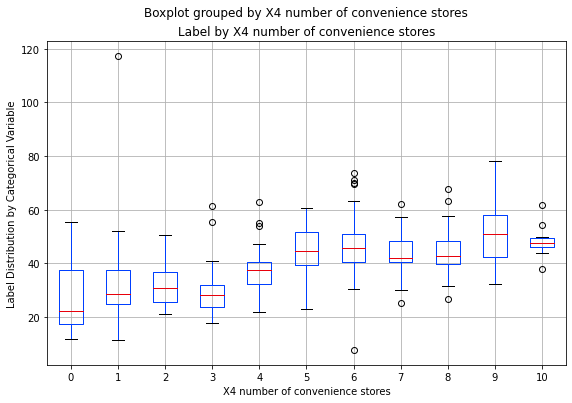

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'Y house price of unit area', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
    fig.savefig(col + '-boxplot.png')
plt.show()

## Train a Regression Model

The challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE)(which must be less than **7**) when evaluated against a test subset of data.



In [11]:
data_70.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Split the dataset Features and Labels

In [12]:
X = data_70.drop(labels = ['No', 'X1 transaction date', 'Y house price of unit area'], axis=1).values
y = data_70['Y house price of unit area'].values

### Seperate the Features and labels into training and test splits, 70-30%

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Preprocess the Data

In [14]:
# Imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4]
numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())])

# Combine Preprocessing Steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features)])

### Train the Model

In [24]:
# Imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create Preprocessing and Training Pipelines
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())])

# Fit the Pipeline to train a Gradient Boosting Estimator on the training dataset
model = pipeline.fit(X_train, (y_train))

### Evaluate the Trained Model

   Mean Squared Error  Root Mean Squared Error  Coefficient of Determination
0           31.253962                 5.590524                        0.8106


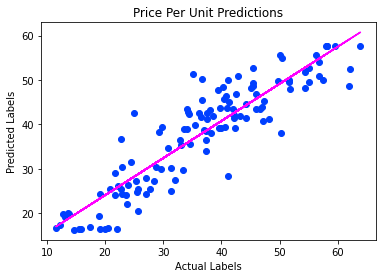

<Figure size 432x288 with 0 Axes>

In [25]:
# Imports
from sklearn.metrics import mean_squared_error, r2_score

# Get Predictions
predictions = model.predict(X_test)

# Display Metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

metrics = pd.DataFrame(
    {
        'Mean Squared Error': pd.Series([mse]),
        'Root Mean Squared Error': pd.Series([rmse]),
        'Coefficient of Determination': pd.Series([r2])
    })

print(metrics)
metrics.to_excel('metrics.xlsx', index=False)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Per Unit Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
plt.savefig('Gradient Boosting Regressor Predictions')

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [26]:
import joblib

# Save the model as a pickle file for future scoring
filename = 'GradientBoostingRegressor-model.pkl'
joblib.dump(model, filename)

['GradientBoostingRegressor-model.pkl']

In [ ]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation for 2 new real estate transactions
X_new = np.array(
    [
        [16.2, 289.3248, 5, 24.98203, 121.54348],
        [13.6, 4082.015, 0, 24.94155, 121.50381]
    ])

# Use the model to predict the price-per-3.3m-square-unit for the new real estate transactions
results = loaded_model.predict(X_new)
print('Price Per Unit 3.3 Square-Metre')
for unit_price in results:
    print(np.round(unit_price))

Price Per Unit 3.3 Square-Metre
50.0
17.0
